# Class : Mass Spectrometry analysis


---
## Learning Objectives
1. MS Analysis
* Generate theoretical mass spectra for a peptide
* Score a theoretical peptide


---
## Peptide Analysis

In class today we will implement computational simulation of a mass spectrum analysis. This will involve generating the b and y ions from a peptide and estimating their mass. We will then plot their spectrum and build a function to estimate maximum multiplicity of the sample.



In [9]:
# Relevant masses for amino acids, H+, and water
H_ion = 1.00728
water = 18.01056

amino_acid_table = {
      'A' : 71.03711,
      'R' : 156.10111,
      'N' : 114.04293,
      'D' : 115.02694,
      'C' : 103.00919,
      'E' : 129.04259,
      'Q' : 128.05858,
      'G' : 57.02146,
      'H' : 137.05891,
      'I' : 113.08406,
      'L' : 113.08406,
      'K' : 128.09496,
      'M' : 131.04049,
      'F' : 147.06841,
      'P' : 97.05276,
      'S' : 87.03203,
      'T' : 101.04768,
      'W' : 186.07931,
      'Y' : 163.06333,
      'V' : 99.06841,
      'X' : 0.00000     #  for unknown amino acids
      } # dictionary of amino acids 'aa' and their monoisotopic mass

Recall from the slides that the y-ion and b-ion are defined for all prefix and suffix strings of a peptide as follows

```
b_ion = AA mass + H+
y_ion = AA_mass + H+ + Water
```


In [10]:
def calc_yion_mass(y_ion):
    ''' Function to estimate y-ion mass
    
    Args:
        y_ion (str): amino acid string
        
    Returns:
        mass (float): Mass of ion
    '''
    mass = water + H_ion
    for aa in y_ion:
        mass += amino_acid_table[aa]
    
    return mass

def calc_bion_mass(b_ion):
    ''' Function to estimate b-ion mass
    
    Args:
        b_ion (str): amino acid string
        
    Returns:
        mass (float): Mass of ion
    '''
    mass = H_ion
    for aa in b_ion:
        mass += amino_acid_table[aa]
    
    return mass

def theoretical_spectrum(peptide_sequence):
    ''' Function to generate theoretical spectrum of a peptide
    
    Args:
        peptide_sequence (str): amino acid string
        
    Returns:
        mass_peaks (list of floats): Masses generated by ions of peptide
    '''
    mass_peaks = []
    for position in range(1,len(peptide_sequence)):
        mass_peaks.append(calc_bion_mass(peptide_sequence[:position]))
        mass_peaks.append(calc_yion_mass(peptide_sequence[position:]))
    return mass_peaks

In [11]:
theoretical_spectrum('APNDFNLK')

[72.04438999999999,
 847.43083,
 169.09715,
 750.37807,
 283.14008,
 636.33514,
 398.16702,
 521.3082,
 545.23543,
 374.23978999999997,
 659.2783599999999,
 260.19686,
 772.3624199999999,
 147.1128]

---
## Plot Spectrum

Next we will plot the theoretical spectrum as shown below:

<img src="figures/spectrum.png">

In [1]:
import matplotlib.pyplot as plt

def plot_spectrum(mass_spectrum):
    ''' Function to plot theoretical mass spectrum
    
    Args:
        mass_peaks (list of floats): Masses generated by ions of peptide
        
    '''
    y_vals = [.3] * len(mass_spectrum)
    fig=plt.figure()
    fig1=fig.add_subplot(111)
    fig1.set_xlim([0,900])
    fig1.set_ylim([0,1])
    fig1.bar(mass_spectrum, y_vals, 5)
    fig1.set_xlabel("m/z") #some axis labeling
    fig1.set_ylabel("abundance") #some axis labeling
    fig1.set_title("Theoretical Spectrum") #some title labeling



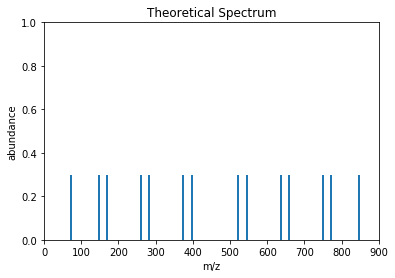

In [94]:
plot_spectrum(theoretical_spectrum('APNDFNLK'))

---
## Score a spectrum

Next we will write a function to score a spectrum against another. This will be useful to compare a real measured spectrum against a database of theoretical spectra to find matches. While there are multiple ways to score these, we will score as a ratio of the matching peak intensities of the measured spectra scaled by the total of all peaks in the spectra. Another common scoring criteria is maximum multiplicity which results in the spectrum with the most similarity.

```
score_spectrum:
    if peaks match:
        score += height
        
    return score / sum(score)
```


In [12]:
def score_spectrum(real_spectrum_peaks, real_spectrum_heights, theoretical_spectrum):
    ''' Function to compare to spectra and score as a ratio of spectrum explained
    
    Args:
        real_spectrum (list of floats): Masses generated by ions of peptide
        theoretical_spectrum (list of floats): Masses generated by ions of peptide
        
    Returns:
        score (float): fraction of theoretical spectrum explained

    '''
    
    score = 0
    for i, peak in enumerate(real_spectrum_peaks):
        if peak in theoretical_spectrum:
            score += real_spectrum_heights[i]
            
    score = score / sum(real_spectrum_heights)
    return score

In [13]:
real_spectrum_peaks = [72.04438999999999, 751.37807, 283.14008, 636.33514, 545.23543, 240.19686, 772.3624199999999, 147.1128]
real_spectrum_heights = [.2, .1, .05, .05, .1, .1, .2, .2]
score_spectrum(real_spectrum_peaks, real_spectrum_heights, theoretical_spectrum('APNDFNLK'))

0.8